In [57]:
from qiskit import Aer, transpile ,execute
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram  # 
from qiskit import QuantumCircuit
from numpy import pi
import numpy as np

In [82]:
def run_sim(qc): 
    backend = Aer.get_backend('qasm_simulator')  # 使用 qasm_simulator 进行测量模拟
    tqc = transpile(qc, backend) 
    job = execute(tqc, backend, shots=1024*5) 
    counts = job.result().get_counts(tqc)
    return counts 

#Step 1 

In [59]:
def QPE(qbits,theta):
    O_cp_count = 0
    O_h_count = 0
    qc = QuantumCircuit(qbits,qbits-1) 
    qc.x(qbits-1)
    for i in range(qbits-1):
        qc.h(i)
        O_h_count+=1
        for j in range(2**i):
            qc.cp(theta,i,qbits-1)
            O_cp_count+=1
    qc = qc.compose(QFT(3, inverse=True), [0, 1, 2])
    for i in range(qbits-1):
            qc.measure(i, i)
    print("The total number of qbits is :", qc.num_qubits)
    print("The Times of H gate is :", O_h_count)
    print("The Times of cp gate is :", O_cp_count)
    return qc



The total number of qbits is : 4
The Times of H gate is : 3
The Times of cp gate is : 7


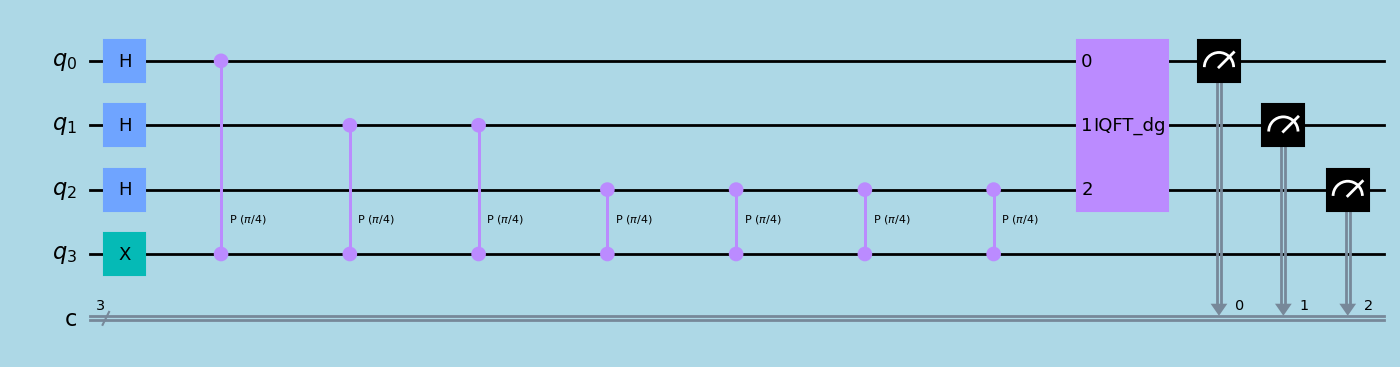

In [60]:
qc = QPE(4,pi / 4)
style = {'backgroundcolor': 'lightblue'}
qc.draw("mpl", style=style)

{'001': 1024}


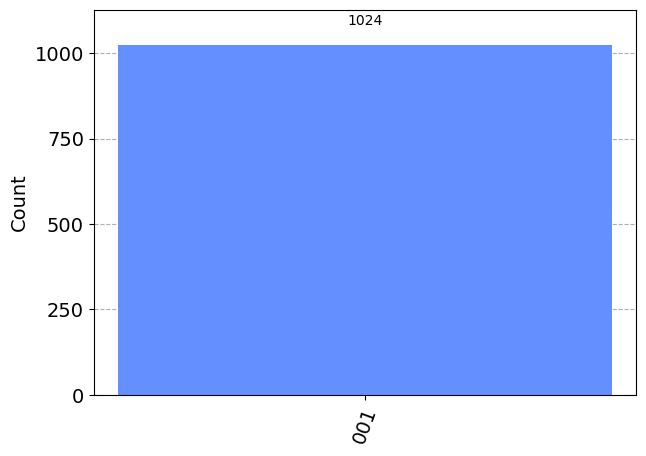

In [61]:
counts = run_sim(qc)
print(counts)
plot_histogram(counts)# which is same as PPT showed

#Step 2

The total number of qbits is : 4
The Times of H gate is : 3
The Times of cp gate is : 7


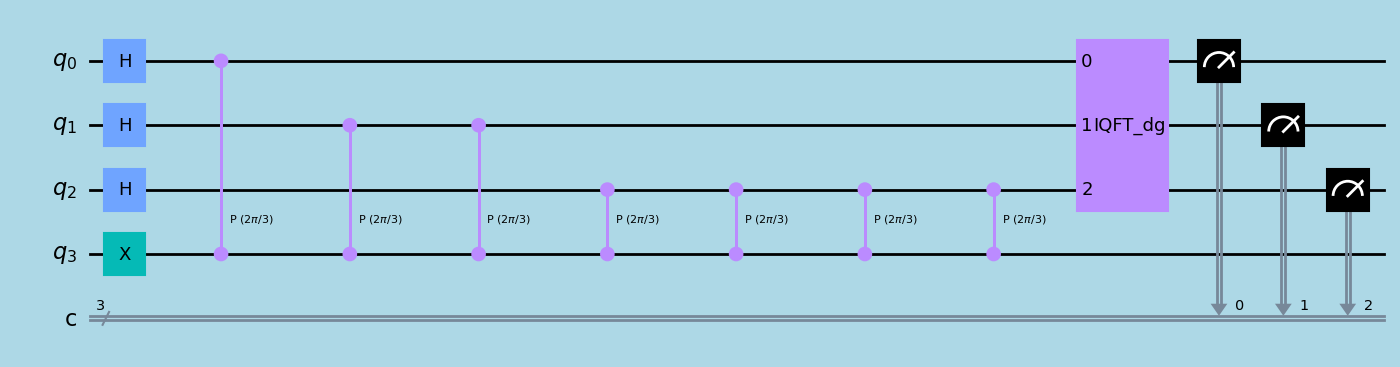

In [70]:
qc = QPE(4,2*pi / 3)
style = {'backgroundcolor': 'lightblue'}
qc.draw("mpl", style=style)

{'101': 17, '110': 13, '001': 20, '100': 61, '000': 19, '010': 157, '111': 13, '011': 724}


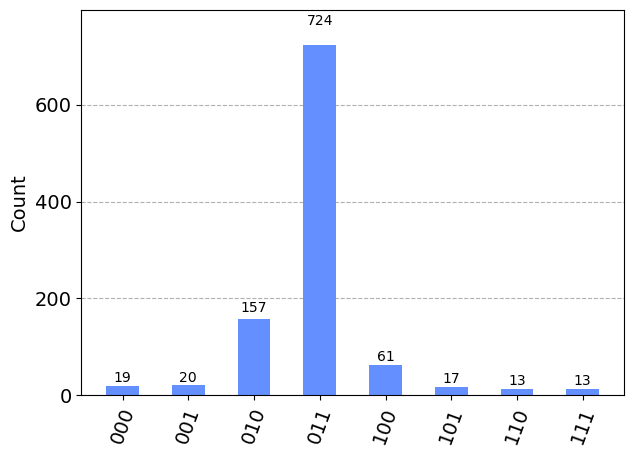

In [71]:
counts = run_sim(qc)
print(counts)
plot_histogram(counts)# which is same as PPT showed

#step3: QPE 的总门数量复杂度为O(2^n),所需的受控U门数量

#step4

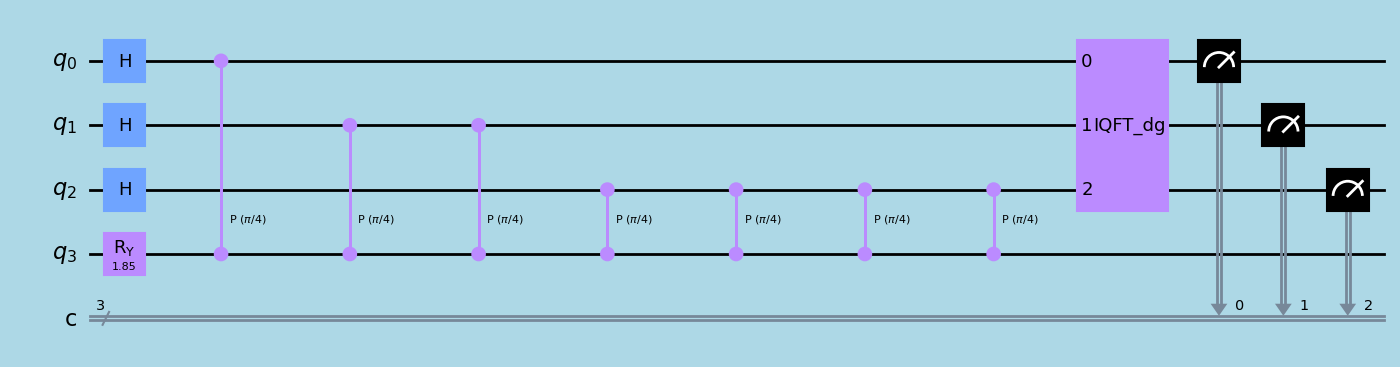

In [84]:
import math
qc = QuantumCircuit(4,4-1) 
theta = 2 * math.acos(3 / 5)
qc.ry(theta, 4-1)
for i in range(4-1):
    qc.h(i)
    for j in range(2**i):
        qc.cp(pi / 4,i,qbits-1)
qc = qc.compose(QFT(3, inverse=True), [0, 1, 2])
for i in range(qbits-1):
        qc.measure(i, i)
style = {'backgroundcolor': 'lightblue'}
qc.draw("mpl", style=style)

{'000': 1862, '001': 3258}


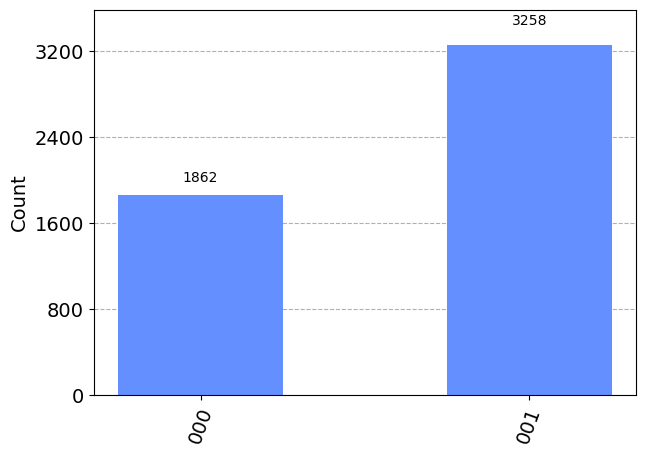

In [85]:
counts = run_sim(qc)
print(counts)
plot_histogram(counts)# which is same as PPT showed